In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import t
from random import sample

- Every group have  to download the Excel files:
Each file has three recorded values of water flow recorded using three sensors S1,S2, and S3.









In [47]:
df = pd.read_excel('Group5.xlsx')
print(df)

      S1   S2   S3
0    502  378  314
1    491  369  390
2    472  363  344
3    470  386  355
4    477  389  383
..   ...  ...  ...
127  500  385  314
128  458  378  371
129  488  386  389
130  509  378  306
131  516  347  327

[132 rows x 3 columns]


- Compute the covariance between three variables

In [63]:
S1_S2_S3= np.array([df.S1,df.S2,df.S3])
covariance = np.cov(S1_S2_S3)
df.cov()


,S1,S2,S3
S1,355.498034,54.396253,9.307425
S2,54.396253,274.075642,160.689105
S3,9.307425,160.689105,905.634976


- Compute the correlation coefficients between three variables

In [62]:
corr_matrix = df.corr()
#print(corr_matrix)
df.corr()

,S1,S2,S3
S1,1.000000,0.174267,0.016403
S2,0.174267,1.000000,0.322533
S3,0.016403,0.322533,1.000000


- Plot and report the relationships between the variables

<Axes: >

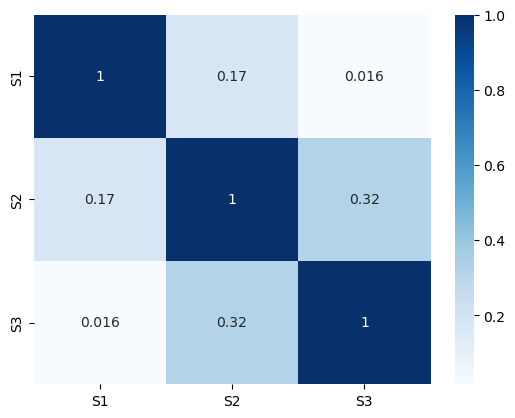

In [50]:
sns.heatmap(df.corr(),cmap='Blues', annot=True)

/Users/deivid/anaconda3/envs/jupyternotebook/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


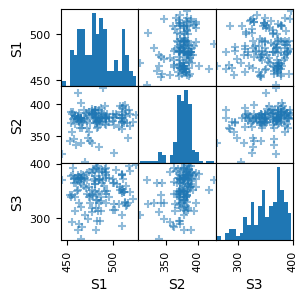

In [51]:
pd.plotting.scatter_matrix(df,hist_kwds={'bins':20}, marker='+',figsize=(3,3))
plt.show()

- Generate a random sample of 50 observations for each sensor

In [52]:
random = df.sample(n=50)

S1_sample = sample(list(df.S1),50)
S2_sample = sample(list(df.S2),50)
S3_sample = sample(list(df.S3),50)
print(S1_sample)
print(S2_sample)
print(S3_sample)

[469, 492, 500, 462, 500, 517, 465, 479, 463, 456, 463, 491, 462, 472, 507, 521, 488, 475, 481, 492, 492, 487, 484, 478, 509, 514, 475, 512, 485, 459, 477, 470, 480, 459, 460, 481, 489, 465, 513, 495, 477, 516, 485, 502, 491, 481, 501, 510, 515, 492]
[377, 388, 382, 378, 339, 370, 384, 378, 378, 347, 378, 336, 389, 397, 379, 378, 388, 363, 321, 356, 376, 394, 398, 379, 390, 372, 345, 418, 373, 390, 368, 379, 332, 393, 386, 384, 386, 373, 372, 394, 402, 397, 380, 367, 372, 377, 356, 370, 372, 390]
[372, 305, 314, 385, 331, 324, 294, 349, 366, 371, 383, 332, 262, 298, 379, 314, 382, 312, 369, 395, 392, 379, 345, 374, 339, 372, 350, 327, 334, 365, 292, 390, 357, 392, 389, 285, 342, 306, 373, 371, 325, 349, 321, 343, 288, 378, 344, 283, 364, 318]


- Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99%.

In [53]:
stats = pd.DataFrame()
stats['Mean']= df.mean()
stats['Stdev']= df.std()
print('S1 values of mean and Standar deviation:',stats['Mean']['S1'], stats['Stdev']['S1'])
#print(stats)

S1 values of mean and Standar deviation: 483.42424242424244 18.85465549334813


In [65]:
stats

,Mean,Stdev
S1,483.424242,18.854655
S2,375.590909,16.555230
S3,351.727273,30.093770


In [54]:
n = len(df)
std_error = df.std(axis=0)/np.sqrt(n)
print(std_error)

S1    1.641087
S2    1.440948
S3    2.619326
dtype: float64


In [55]:
t_value_90 = t.ppf(0.90, n-1)
t_value_95 = t.ppf(0.95, n-1)
t_value_99 = t.ppf(0.99, n-1)
margin_of_error_90 = t_value_90*std_error
margin_of_error_95 = t_value_95*std_error
margin_of_error_99 = t_value_99*std_error
print(margin_of_error_90)
print(margin_of_error_95)
print(margin_of_error_99)

S1    2.113798
S2    1.856009
S3    3.373817
dtype: float64
S1    2.718573
S2    2.387029
S3    4.339094
dtype: float64
S1    3.865007
S2    3.393649
S3    6.168908
dtype: float64


In [56]:
upper_bound_90 = stats['Mean'] + margin_of_error_90
lower_bound_90 = stats['Mean'] - margin_of_error_90

upper_bound_95 = stats['Mean'] + margin_of_error_95
lower_bound_95 = stats['Mean'] - margin_of_error_95

upper_bound_99 = stats['Mean'] + margin_of_error_99
lower_bound_99 = stats['Mean'] - margin_of_error_99

#print(f"{upper_bound_90} {lower_bound_90}")
#print(f"{upper_bound_95} {lower_bound_95}")
#print(f"{upper_bound_99} {lower_bound_99}")
#print(upper_bound_90, lower_bound_90)

- Compare the population means of each sample with the estimated one given the samples